### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

# Communities Data

## Clean and explore data

In [3]:
gov_arch_csv = 'data/Communities-Grid-view.csv'

In [4]:
gov_df = pd.read_csv(gov_arch_csv)

In [5]:
gov_df.head()

Name                                       Institutions  \
0  !Kung San (Ju/hoansi)                         Hxaro,Headman,Group,Kgotla   
1  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
2                   Akha  Council of Elders,Village Founder-Leader (dzom...   
3                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
4            Arab nomads                 shaykh or sayyid,shura or mashwara   

                                           Mechanism  \
0  Leader (first among equals),Deliberation,Corpo...   
1  Election,Council (central) ,Assembly (central)...   
2  Leader (first among equals),Gerontocracy,Conse...   
3  Election,Magistrate/official,Heredity,Constitu...   
4  Consensus,Oath,Handshake,Leader (first among e...   

                                Culture/Values/Norms  \
0  Reciprocity,Cooperation,Egalitarianism,Generos...   
1                            Shared identity/Kinship   
2  Shared identity/Kinship,Ritual,Supernatural,Wr...   
3  Written rules,Cooperation,Obedience to authori...   
4                                                NaN   

                                               Notes  \
0  Hxaro - System of mutual reciprocity and socia...   
1  There are many Celtic oppida throughout northe...   
2                                                NaN   
3  Camera, M, p. 29 ("La sua popolazione che nel ...   
4  Nomadic Bedouin society governed by rulers sel...   

                                           Time span        Geography  \
0      20th century - Present\n(dates are arbitrary)     Africa South   
1                                 2nd-1st century BC     Europe North   
2                             20th century - Present  Asia Southeast    
3                                4th-12th century AD      Europe West   
4  1st-7th century AD\n(start date is arbitrary, ...      Middle East   

                          Size  \
0               1,001 - 10,000   
1  100,001 - 1 million members   
2             10,001 - 100,000   
3             10,001 - 100,000   
4                      Unknown   

                                              Source  \
0  Polly Wiessner (1982), Risk, reciprocity and s...   
1  Collis, “Celtic” Oppida, in Hansen, A Comparat...   
2  Main: \nKammerer, Cornelia Ann (1985/86), Gate...   
3  Camera, M. Istoria della città e costiera di A...   
4  Stasavage, David (2020), The Decline and Rise ...   

                                           Metanotes  \
0  Standing in for small-scale egalitarian bands....   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      Heterogeneity   \
0                                                NaN   
1                                                NaN   
2  Informal inclusion,Gender groups,Informal powe...   
3                                                NaN   
4                                                NaN   

                                         FC comments expert check  
0                                    Edited April 23          NaN  
1                                    Edited March 23          NaN  
2                                      Edited May 23          NaN  
3      Edited March 23 (could use more info on CGIs)          NaN  
4  Edited Feb 23 (could use additional sources fo...          NaN

In [6]:
gov_df.describe()

Name                         Institutions  \
count                      66                                   66   
unique                     66                                   65   
top     !Kung San (Ju/hoansi)  Assembly,Council,Courts,Magistrates   
freq                        1                                    2   

                                                Mechanism  \
count                                                  66   
unique                                                 66   
top     Leader (first among equals),Deliberation,Corpo...   
freq                                                    1   

           Culture/Values/Norms  \
count                        54   
unique                       49   
top     Shared identity/Kinship   
freq                          5   

                                                    Notes  \
count                                                  64   
unique                                                 64   
top     Hxaro - System of mutual reciprocity and socia...   
freq                                                    1   

                   Time span            Geography              Size  \
count                     66                   66                64   
unique                    60                   39                10   
top     18th-19th century AD  Europe South, Italy  10,001 - 100,000   
freq                       4                    8                26   

                                                   Source  \
count                                                  66   
unique                                                 63   
top     Heide Goettner-Abendroth, Matriarchal Societie...   
freq                                                    3   

                                                Metanotes  \
count                                                  21   
unique                                                 20   
top     The choice of rendering the Greek political en...   
freq                                                    2   

                                           Heterogeneity     FC comments  \
count                                                  13             66   
unique                                                 12             28   
top     Social groups,Inclusion through different inst...  Edited May 23   
freq                                                    2             22   

           expert check  
count                 7  
unique                3  
top     Giacomo CHECKED  
freq                  5

In [7]:
list(gov_df)

['Name',
 'Institutions',
 'Mechanism',
 'Culture/Values/Norms',
 'Notes',
 'Time span',
 'Geography',
 'Size',
 'Source',
 'Metanotes',
 'Heterogeneity ',
 'FC comments',
 'expert check']

# Data prep

In [8]:
gov_df_ready = gov_df

## Encode Mechanism categories

In [9]:
gov_df_ready['Mechanism']

0     Leader (first among equals),Deliberation,Corpo...
1     Election,Council (central) ,Assembly (central)...
2     Leader (first among equals),Gerontocracy,Conse...
3     Election,Magistrate/official,Heredity,Constitu...
4     Consensus,Oath,Handshake,Leader (first among e...
5     President/Consul/Chief Executive,Assembly (cen...
6     Election,Plurality voting,Temporary position o...
7     Autocratic Leader/Chief (bound),Heredity,Merit...
8     Leader (first among equals),Assembly (central)...
9     Autocratic Leader/Chief (bound),Blood relation...
10    Leader (first among equals),Heredity,Matriline...
11    Meritocracy,Oath,Military force,Remunerated po...
12           Council (central) ,Gerontocracy,Matriarchy
13    Co-optation,Voting,Election,Temporary position...
14    Autocratic Leader/Chief (bound),Consultation,A...
15    Assembly (central),Confederacy,Turnover/rotati...
16    Autocratic Leader/Chief (bound),Council (centr...
17    Petition,Autocratic Leader (unbound),Divin

In [10]:
mechanism_list = list(gov_df_ready['Mechanism'])

In [11]:
mech_test = mechanism_list[0]

In [12]:
mech_test.split(',')

['Leader (first among equals)',
 'Deliberation',
 'Corporal punishment/Violence against perpetrator',
 'Self-help',
 'Mediation',
 'Negotiation',
 'Exit',
 'Criticism/Mocking/Joking',
 'Reputational risk',
 'Suspension/Expulsion/Ostracism/Proscription',
 'Tribunal/Court ',
 'Meritocracy']

In [13]:
test_set = set()

In [14]:
test_set.update(mech_test.split(','))
test_set

{'Corporal punishment/Violence against perpetrator',
 'Criticism/Mocking/Joking',
 'Deliberation',
 'Exit',
 'Leader (first among equals)',
 'Mediation',
 'Meritocracy',
 'Negotiation',
 'Reputational risk',
 'Self-help',
 'Suspension/Expulsion/Ostracism/Proscription',
 'Tribunal/Court '}

In [15]:
mechanism_set = set()

In [16]:
# Create set of all mechanisms
[mechanism_set.update(mechanisms.split(',')) for mechanisms in mechanism_list]
mechanism_set

{'Age boundaries',
 'Agenda setting',
 'Alliance',
 'Appeal',
 'Arbitration',
 'Assembly (central)',
 'Assembly (elite)',
 'Assembly (local)',
 'Autocratic Leader (unbound)',
 'Autocratic Leader/Chief (bound)',
 'Balance of power',
 'Blood relations',
 'Board/Committee',
 'Bureaucracy',
 'Capital punishment',
 'Checks and balances',
 'Civil disobedience',
 'Co-optation',
 'Coalition',
 'Confederacy',
 'Consensus',
 'Consent',
 'Constitution',
 'Consultation',
 'Corporal punishment/Violence against perpetrator',
 'Council (central) ',
 'Council (local)',
 'Criticism/Mocking/Joking',
 'Delegation',
 'Deliberation',
 'Destruction of property',
 'Divine right',
 'Dreaming',
 'Dual-sex political system',
 'Election',
 'Enfranchisement',
 'Exit',
 'Fines',
 'Forced labour',
 'Frequent and/or regular meetings',
 'Gerontocracy',
 'Graduated sanctions',
 'Group voting',
 'Handshake',
 'Heredity',
 'Induction rite/ceremony',
 'Judicial review',
 'Jury/Judge',
 'King(chief)-as-Figurehead',
 'Lead

### Add mechanism columns
Add columns in the format of `mechanism_is_{mechanism}`

In [17]:
test_df = gov_df_ready[gov_df_ready['Mechanism'].str.contains('Consent')]

In [18]:
test_df

Name  \
3                        Amalfi   
6     Athens (Classical Period)   
8                     Babylonia   
10  Central African communities   
18        England (Anglo Saxon)   
28                        Huron   
40                        Mari    
46                   Nambikuara   

                                         Institutions  \
3   Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
6   Council of Five Hundred (Boule),Areopagus,Ekkl...   
8   Governor,Council of Elders,The citizens/The As...   
10                      Big man,Council,ngongo munene   
18  witan,shire reeve,shire court,wapentake,gemot,...   
28  Captain,Village council,Tribal chief,Tribe cou...   
40  Šapitum,Sugagum,Merhum,Laputtum,Halsums,Yamini...   
46                                          Uilikande   

                                            Mechanism  \
3   Election,Magistrate/official,Heredity,Constitu...   
6   Election,Plurality voting,Temporary position o...   
8   Leader (first among equals),Assembly (central)...   
10  Leader (first among equals),Heredity,Matriline...   
18  Autocratic Leader/Chief (bound),Jury/Judge,Con...   
28  Gerontocracy,Election,Plurality voting,Meritoc...   
40  Autocratic Leader/Chief (bound),Consent,Magist...   
46  Leader (first among equals),Voting,Meritocracy...   

                                 Culture/Values/Norms  \
3   Written rules,Cooperation,Obedience to authori...   
6   Discrimination,Egalitarianism,Shared identity/...   
8                             Shared identity/Kinship   
10  Ritual,Supernatural,Shared identity/Kinship,So...   
18                                                NaN   
28  Gender equality,Solidarity,Cooperation,Reputat...   
40                            Shared identity/Kinship   
46  Egalitarianism,Ritual,Reciprocity,Greediness,G...   

                                                Notes  \
3   Camera, M, p. 29 ("La sua popolazione che nel ...   
6   'Cleisthenes reorganized Athens into 139 demes...   
8   The city-states of southern Mesopotamia in the...   
10  Villages spread across a large region. Politic...   
18  Population numbers from Wikipedia, citing Dome...   
28  Huron\n- 'a political system based on both cen...   
40  Tribal confederacy of semi-nomadic Amorites he...   
46  CASE USED BY G&W TO DISCUSS SEASONALITY BUT NO...   

                                            Time span  \
3                                 4th-12th century AD   
6                     5th-4th century BC (508-322 BC)   
8                                 9th-7th century BC    
10  10th -15th century AD\n(start date is arbitrar...   
18                              5th - 11th century AD   
28                                    17th century AD   
40                    18th century BC\n(1800-1760 BC)   
46                                    20th century AD   

                              Geography                            Size  \
3                           Europe West                10,001 - 100,000   
6                          Europe South     100,001 - 1 million members   
8   Middle East, Mesopotamia, Babylonia                10,001 - 100,000   
10                       Africa Central                10,001 - 100,000   
18                          Europe West  1 million - 10 million members   
28                       North America                 10,001 - 100,000   
40                          Middle East                             NaN   
46                South America, Brazil                  1,001 - 10,000   

                                               Source  \
3   Camera, M. Istoria della città e costiera di A...   
6   Stasavage, David (2020), The Decline and Rise ...   
8   Larsen, The City-States of the Early Neo-Babyl...   
10  Vansina, Jan (2004), How Societies Are Born: G...   
18  Stasavage, David (2020), The Decline and Rise ...   
28  Stasavage, David (2020), The Decline and Rise ...   
40  Fleming, Daniel (2004), Democracy’s Ancient An...   
46  Lévi-

In [19]:
gov_df_ready['Mechanism']

0     Leader (first among equals),Deliberation,Corpo...
1     Election,Council (central) ,Assembly (central)...
2     Leader (first among equals),Gerontocracy,Conse...
3     Election,Magistrate/official,Heredity,Constitu...
4     Consensus,Oath,Handshake,Leader (first among e...
5     President/Consul/Chief Executive,Assembly (cen...
6     Election,Plurality voting,Temporary position o...
7     Autocratic Leader/Chief (bound),Heredity,Merit...
8     Leader (first among equals),Assembly (central)...
9     Autocratic Leader/Chief (bound),Blood relation...
10    Leader (first among equals),Heredity,Matriline...
11    Meritocracy,Oath,Military force,Remunerated po...
12           Council (central) ,Gerontocracy,Matriarchy
13    Co-optation,Voting,Election,Temporary position...
14    Autocratic Leader/Chief (bound),Consultation,A...
15    Assembly (central),Confederacy,Turnover/rotati...
16    Autocratic Leader/Chief (bound),Council (centr...
17    Petition,Autocratic Leader (unbound),Divin

In [20]:
for mechanism in mechanism_set:
    mechanism_str = mechanism.lower().replace(' ', '_').replace('/', '_').replace('(','').replace(')','') # Normalize text
    col_name = 'mechanisms_include_' + mechanism_str
    gov_df_ready[col_name] = np.where(gov_df_ready['Mechanism'].str.contains(mechanism), 1, 0)

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/249262651.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  gov_df_ready[col_name] = np.where(gov_df_ready['Mechanism'].str.contains(mechanism), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/249262651.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  gov_df_ready[col_name] = np.where(gov_df_ready['Mechanism'].str.contains(mechanism), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/249262651.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  gov_df_ready[col_name] = np.where(gov_df_ready['Mechanism'].str.contains(mechanism), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/249262651.py:4

In [21]:
gov_df_ready

Name  \
0                              !Kung San (Ju/hoansi)   
1                              Aedui (Celtic Oppida)   
2                                               Akha   
3                                             Amalfi   
4                                        Arab nomads   
5                                              Assur   
6                          Athens (Classical Period)   
7                                  Aztec City-States   
8                                          Babylonia   
9                                           Carthage   
10                       Central African communities   
11                            Chinese Warring States   
12                                       Circassians   
13                                           Cologne   
14                        Communes (Medieval Europe)   
15                                    Dutch Republic   
16                                             Ebla    
17                                            Egypt    
18                             England (Anglo Saxon)   
19                              Etruscan Dodecapolis   
20                                              G/wi   
21                                      Genoa (doge)   
22                                   Genoa (podesta)   
23                                 Greek democracies   
24                                 Greek oligarchies   
25                           Haudenosanee (Iroquois)   
26                                 Hausa City-States   
27                                    Hmong villages   
28                                             Huron   
29                                          Iceland    
30                                       Igbo People   
31                    Ijo of the Eastern Niger Delta   
32  Imperial and Free Towns of the Holy Roman Empire   
33                                  Indian Republics   
34                              Japan (Early Modern)   
35                                     Kachin gumlao   
36                                             Khasi   
37                                            Latium   
38                                             M’zab   
39                                             Makah   
40                                             Mari    
41                                       Minangkabau   
42                                Mixtec City-States   
43                                            Mohave   
44                                     Mongol Nomads   
45                                             Mosuo   
46                                        Nambikuara   
47                                    Natchez people   
48                                         Nebelivka   
49                                       Negara Ubud   
50                                       Nlaka'pamux   
51                                            Oaxaca   
52                       Pathan Hill Tribes/Pashtuns   
53                                         Phoenicia   
54                                              Pisa   
55                                              Pomo   
56                                   Rome (republic)   
57                                  Russian Communes   
58                                             Samoa   
59                                             Siena   
60                                            Sippar   
61                                       Switzerland   
62                                         Tai Muang   
63                                          Tlaxcala   
64                                            Venice   
65                                    Wendat (Huron)   

                                         Institutions  \
0                          Hxaro,Headman,Group,Kgotla   
1              Senatus,Elected magistrates,Assemblies   
2   Council of Elders,Village Founder-Leader (dzom...   
3   Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
4         

## Encode Culture/Values/Norms

In [22]:
gov_df_ready['Culture/Values/Norms'] = gov_df_ready['Culture/Values/Norms'].fillna('')

In [23]:
gov_df_ready['Culture/Values/Norms']

0     Reciprocity,Cooperation,Egalitarianism,Generos...
1                               Shared identity/Kinship
2     Shared identity/Kinship,Ritual,Supernatural,Wr...
3     Written rules,Cooperation,Obedience to authori...
4                                                      
5                 Shared identity/Kinship,Written rules
6     Discrimination,Egalitarianism,Shared identity/...
7     Strict hierarchy/caste system,Obedience to aut...
8                               Shared identity/Kinship
9                                                      
10    Ritual,Supernatural,Shared identity/Kinship,So...
11    Written rules,Obedience to authority,Cooperati...
12                               Obedience to authority
13                        Strict hierarchy/caste system
14                                                     
15                                          Cooperation
16    Obedience to authority,Shared identity/Kinship...
17    Written rules,Supernatural,Ritual,Innovati

In [24]:
values_list = list(gov_df_ready['Culture/Values/Norms'])

In [25]:
values_test = values_list[0]
values_test

'Reciprocity,Cooperation,Egalitarianism,Generosity,Gender equality,Fairness'

In [26]:
[v.strip() for v in values_test.split(',')]

['Reciprocity',
 'Cooperation',
 'Egalitarianism',
 'Generosity',
 'Gender equality',
 'Fairness']

In [27]:
values_set = set()

In [28]:
# Create set of all values
[values_set.update([v.strip() for v in values.split(',')]) for values in values_list]
values_set

{'',
 '(TO APPROVE) Respect',
 'Cheating/Corruption',
 'Competition',
 'Cooperation',
 'Culture of War',
 'Discrimination',
 'Diversity',
 'Egalitarianism',
 'Equality in opportunity',
 'Fairness',
 'Free Speech',
 'Freedom',
 'Gender equality',
 'Generosity',
 'Greediness',
 'Individualism',
 'Innovation',
 'Loyalty/Patriotism',
 'Nationalism',
 'Obedience to authority',
 'Reciprocity',
 'Reputation/Honour',
 'Revenge',
 'Ritual',
 'Shared identity/Kinship',
 'Solidarity',
 'Strict hierarchy/caste system',
 'Supernatural',
 'Unwritten rules',
 'Written rules'}

In [29]:
values_set.remove('')

In [30]:
values_set

{'(TO APPROVE) Respect',
 'Cheating/Corruption',
 'Competition',
 'Cooperation',
 'Culture of War',
 'Discrimination',
 'Diversity',
 'Egalitarianism',
 'Equality in opportunity',
 'Fairness',
 'Free Speech',
 'Freedom',
 'Gender equality',
 'Generosity',
 'Greediness',
 'Individualism',
 'Innovation',
 'Loyalty/Patriotism',
 'Nationalism',
 'Obedience to authority',
 'Reciprocity',
 'Reputation/Honour',
 'Revenge',
 'Ritual',
 'Shared identity/Kinship',
 'Solidarity',
 'Strict hierarchy/caste system',
 'Supernatural',
 'Unwritten rules',
 'Written rules'}

In [31]:
for value in values_set:
    value_str = value.lower().replace('/', '_').replace(' ','_').replace('(','').replace(')','') # Normalize text
    col_name = 'values_include_' + value_str
    gov_df_ready[col_name] = np.where(gov_df_ready['Culture/Values/Norms'].str.contains(value), 1, 0)

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/1168447056.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gov_df_ready[col_name] = np.where(gov_df_ready['Culture/Values/Norms'].str.contains(value), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/1168447056.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gov_df_ready[col_name] = np.where(gov_df_ready['Culture/Values/Norms'].str.contains(value), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/1168447056.py:4: 

## Encode Institutions

In [32]:
gov_df_ready['Institutions'] = gov_df_ready['Institutions'].fillna('')

In [33]:
gov_df_ready['Institutions']

0                            Hxaro,Headman,Group,Kgotla
1                Senatus,Elected magistrates,Assemblies
2     Council of Elders,Village Founder-Leader (dzom...
3     Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...
4                    shaykh or sayyid,shura or mashwara
5                     King,Alum,Limmum,Scribe,City hall
6     Council of Five Hundred (Boule),Areopagus,Ekkl...
7                       Tlatoani,Council of high nobles
8     Governor,Council of Elders,The citizens/The As...
9     Rab kohanim,Council of Elders,Tribunal of 104,...
10                        Big man,Council,ngongo munene
11    Guo Ren Assembly,King,Shi (Reforming Minister)...
12                                Council of Matriarchs
13    Rentmeister,City council,Rentkammern,Richerzec...
14                                        King,Assembly
15    Vroedschap,Magistracies,Stadholder,States-Gene...
16    En (malkum),Ø,Lugal,Abba,Notables/ Officials,L...
17    Pharaoh,Vizier (t3.ty),'Overseer of the Tr

In [34]:
institutions_list = list(gov_df_ready['Institutions'])

In [35]:
institutions_list

['Hxaro,Headman,Group,Kgotla',
 'Senatus,Elected magistrates,Assemblies',
 "Council of Elders,Village Founder-Leader (dzoma),Assistant Founder-Leaders (dzoza),White-Skirted Woman,Reciter (p'ima),Shaman,Sama,Village Headman (phuujajbaan),Strongman (xaqma),Blacksmith",
 'Prefetturii/ Conti/ Dogi,Sedile di congrega,Tavole Amalfitane,Consudetudini,Comizi',
 'shaykh or sayyid,shura or mashwara',
 'King,Alum,Limmum,Scribe,City hall',
 "Council of Five Hundred (Boule),Areopagus,Ekklesia,People's courts,Magistrates",
 'Tlatoani,Council of high nobles',
 'Governor,Council of Elders,The citizens/The Assembly of the city',
 'Rab kohanim,Council of Elders,Tribunal of 104,Suffetes,Ham',
 'Big man,Council,ngongo munene',
 'Guo Ren Assembly,King,Shi (Reforming Minister),Fa jing,Feng,Quan,Jue,Xian/ Jun,Ling,Cheng,Wei (Military commander),Sefu,Fu,Persuader/ Diplomat,Scholar/ Boshi,Ba,Assembly of the leading cities,Guo,Warrior Elite',
 'Council of Matriarchs',
 'Rentmeister,City council,Rentkammern,Rich

In [36]:
institutions_test = institutions_list[0]
institutions_test

'Hxaro,Headman,Group,Kgotla'

In [37]:
[i.strip() for i in institutions_test.split(',')]

['Hxaro', 'Headman', 'Group', 'Kgotla']

In [38]:
institutions_set = set()

In [39]:
# String test
"\'\'\"".strip().replace('"', '').replace('\'','')

''

In [40]:
test_string = '"Hunting ""chief"""'
test_string

'"Hunting ""chief"""'

In [41]:
test_string.strip().replace('\"', '').replace('\'','')

'Hunting chief'

In [42]:
# Create set of all values
[institutions_set.update([i.lower().strip() for i in institutions.split(',')]) for institutions in institutions_list]
institutions_set

{'"""chief"" of the ceremonies and dances"',
 '"hunting ""chief"""',
 '"shamanic ""guild"""',
 "'hearers' (sdmw) and 'the great prison' (hnrt wr)",
 "'overseer of police(men)' (imy-r sntw) and the '(reception-)hall of the pr-nsw' (h3 n pr-nsw)",
 "'overseer of the district' (imy-r w)",
 "'overseer of the treasury' (imy-r htm)",
 '(tribal) elders',
 'abba',
 'adat',
 'aediles',
 'agyi',
 'allthing',
 'alum',
 'amanyanabo',
 'anasi',
 'areopagus',
 'aristocratic offices',
 'assemblies',
 'assemblies of the rural cantons',
 'assembly',
 'assembly houses',
 'assembly of house heads',
 'assembly of the leading cities',
 'assistant founder-leaders (dzoza)',
 'awo',
 'azzaba',
 'ba',
 'babtu',
 'babylonian king',
 'band',
 'banjar (hamlet)',
 'bawmung',
 'big man',
 'blacksmith',
 'braves (kwanamis)',
 'buah gadang',
 'burgermeister',
 'captain',
 'cargos or tequio',
 'censor',
 'ceremonial officials',
 'chao',
 "chayk du wadi m'zab",
 'cheng',
 'chief for dealing with white people',
 'chiefs

In [43]:
len(institutions_set)

296

In [44]:
# Cleanup
cleaned_institutions_set = {i.replace('\"', '').replace('\'','') for i in institutions_set}

In [45]:
cleaned_institutions_set

{'(tribal) elders',
 'abba',
 'adat',
 'aediles',
 'agyi',
 'allthing',
 'alum',
 'amanyanabo',
 'anasi',
 'areopagus',
 'aristocratic offices',
 'assemblies',
 'assemblies of the rural cantons',
 'assembly',
 'assembly houses',
 'assembly of house heads',
 'assembly of the leading cities',
 'assistant founder-leaders (dzoza)',
 'awo',
 'azzaba',
 'ba',
 'babtu',
 'babylonian king',
 'band',
 'banjar (hamlet)',
 'bawmung',
 'big man',
 'blacksmith',
 'braves (kwanamis)',
 'buah gadang',
 'burgermeister',
 'captain',
 'cargos or tequio',
 'censor',
 'ceremonial officials',
 'chao',
 'chayk du wadi mzab',
 'cheng',
 'chief for dealing with white people',
 'chief of the ceremonies and dances',
 'chiefs',
 'church',
 'city council',
 'city hall',
 'clerk',
 'college of judges',
 'colloquium civitatis',
 'comitia centuriata',
 'comizi',
 'commoners offices',
 'communal assembly (skhod)',
 'commune consilium of sapientes or boni homines',
 'commune officials',
 'concilium plebis',
 'confeder

In [46]:
len(cleaned_institutions_set)

296

In [47]:
institutions_set.difference(cleaned_institutions_set)

{'"""chief"" of the ceremonies and dances"',
 '"hunting ""chief"""',
 '"shamanic ""guild"""',
 "'hearers' (sdmw) and 'the great prison' (hnrt wr)",
 "'overseer of police(men)' (imy-r sntw) and the '(reception-)hall of the pr-nsw' (h3 n pr-nsw)",
 "'overseer of the district' (imy-r w)",
 "'overseer of the treasury' (imy-r htm)",
 "chayk du wadi m'zab",
 "commoners' offices",
 "dar al-'achira",
 "djadjat council 'men of the circle'",
 "guilds' representatives",
 "herald (whm.w) and herald's office",
 "men's grand council",
 "people's courts",
 "qenbet council 'men of the angle'",
 "reciter (p'ima)",
 "sim'alites",
 "women's clan council",
 "yakatha'alya women"}

In [48]:
cleaned_institutions_set.difference(institutions_set)

{'chayk du wadi mzab',
 'chief of the ceremonies and dances',
 'commoners offices',
 'dar al-achira',
 'djadjat council men of the circle',
 'guilds representatives',
 'hearers (sdmw) and the great prison (hnrt wr)',
 'herald (whm.w) and heralds office',
 'hunting chief',
 'mens grand council',
 'overseer of police(men) (imy-r sntw) and the (reception-)hall of the pr-nsw (h3 n pr-nsw)',
 'overseer of the district (imy-r w)',
 'overseer of the treasury (imy-r htm)',
 'peoples courts',
 'qenbet council men of the angle',
 'reciter (pima)',
 'shamanic guild',
 'simalites',
 'womens clan council',
 'yakathaalya women'}

In [49]:
for institution in institutions_set:
    institution_str = institution.lower().replace('/', '_').replace(' ','_').replace('(','').replace(')','') # Normalize text
    col_name = 'institutions_include_' + institution_str
    gov_df_ready[col_name] = np.where(gov_df_ready['Institutions'].str.contains(institution), 1, 0)

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/2641095988.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gov_df_ready[col_name] = np.where(gov_df_ready['Institutions'].str.contains(institution), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/2641095988.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gov_df_ready[col_name] = np.where(gov_df_ready['Institutions'].str.contains(institution), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/2641095988.py:4: Perf

In [50]:
gov_df_ready.head()

Name                                       Institutions  \
0  !Kung San (Ju/hoansi)                         Hxaro,Headman,Group,Kgotla   
1  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
2                   Akha  Council of Elders,Village Founder-Leader (dzom...   
3                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
4            Arab nomads                 shaykh or sayyid,shura or mashwara   

                                           Mechanism  \
0  Leader (first among equals),Deliberation,Corpo...   
1  Election,Council (central) ,Assembly (central)...   
2  Leader (first among equals),Gerontocracy,Conse...   
3  Election,Magistrate/official,Heredity,Constitu...   
4  Consensus,Oath,Handshake,Leader (first among e...   

                                Culture/Values/Norms  \
0  Reciprocity,Cooperation,Egalitarianism,Generos...   
1                            Shared identity/Kinship   
2  Shared identity/Kinship,Ritual,Supernatural,Wr...   
3  Written rules,Cooperation,Obedience to authori...   
4                                                      

                                               Notes  \
0  Hxaro - System of mutual reciprocity and socia...   
1  There are many Celtic oppida throughout northe...   
2                                                NaN   
3  Camera, M, p. 29 ("La sua popolazione che nel ...   
4  Nomadic Bedouin society governed by rulers sel...   

                                           Time span        Geography  \
0      20th century - Present\n(dates are arbitrary)     Africa South   
1                                 2nd-1st century BC     Europe North   
2                             20th century - Present  Asia Southeast    
3                                4th-12th century AD      Europe West   
4  1st-7th century AD\n(start date is arbitrary, ...      Middle East   

                          Size  \
0               1,001 - 10,000   
1  100,001 - 1 million members   
2             10,001 - 100,000   
3             10,001 - 100,000   
4                      Unknown   

                                              Source  \
0  Polly Wiessner (1982), Risk, reciprocity and s...   
1  Collis, “Celtic” Oppida, in Hansen, A Comparat...   
2  Main: \nKammerer, Cornelia Ann (1985/86), Gate...   
3  Camera, M. Istoria della città e costiera di A...   
4  Stasavage, David (2020), The Decline and Rise ...   

                                           Metanotes  \
0  Standing in for small-scale egalitarian bands....   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      Heterogeneity   \
0                                                NaN   
1                                                NaN   
2  Informal inclusion,Gender groups,Informal powe...   
3                                                NaN   
4                                                NaN   

                                         FC comments expert check  \
0                                    Edited April 23          NaN   
1                                    Edited March 23          NaN   
2                                      Edited May 23          NaN   
3      Edited March 23 (could use more info on CGIs)          NaN   
4  Edited Feb 23 (could use additional sources fo...          NaN   

   mechanisms_include_police  mechanisms_include_gerontocracy  \
0                          0                                0   
1                          0                                0   
2                          0                                1   
3                          0                                0   
4                          0                                0   

   mechanisms_include_capital_punishment  \
0                            

In [51]:
gov_df_ready

Name  \
0                              !Kung San (Ju/hoansi)   
1                              Aedui (Celtic Oppida)   
2                                               Akha   
3                                             Amalfi   
4                                        Arab nomads   
5                                              Assur   
6                          Athens (Classical Period)   
7                                  Aztec City-States   
8                                          Babylonia   
9                                           Carthage   
10                       Central African communities   
11                            Chinese Warring States   
12                                       Circassians   
13                                           Cologne   
14                        Communes (Medieval Europe)   
15                                    Dutch Republic   
16                                             Ebla    
17                                            Egypt    
18                             England (Anglo Saxon)   
19                              Etruscan Dodecapolis   
20                                              G/wi   
21                                      Genoa (doge)   
22                                   Genoa (podesta)   
23                                 Greek democracies   
24                                 Greek oligarchies   
25                           Haudenosanee (Iroquois)   
26                                 Hausa City-States   
27                                    Hmong villages   
28                                             Huron   
29                                          Iceland    
30                                       Igbo People   
31                    Ijo of the Eastern Niger Delta   
32  Imperial and Free Towns of the Holy Roman Empire   
33                                  Indian Republics   
34                              Japan (Early Modern)   
35                                     Kachin gumlao   
36                                             Khasi   
37                                            Latium   
38                                             M’zab   
39                                             Makah   
40                                             Mari    
41                                       Minangkabau   
42                                Mixtec City-States   
43                                            Mohave   
44                                     Mongol Nomads   
45                                             Mosuo   
46                                        Nambikuara   
47                                    Natchez people   
48                                         Nebelivka   
49                                       Negara Ubud   
50                                       Nlaka'pamux   
51                                            Oaxaca   
52                       Pathan Hill Tribes/Pashtuns   
53                                         Phoenicia   
54                                              Pisa   
55                                              Pomo   
56                                   Rome (republic)   
57                                  Russian Communes   
58                                             Samoa   
59                                             Siena   
60                                            Sippar   
61                                       Switzerland   
62                                         Tai Muang   
63                                          Tlaxcala   
64                                            Venice   
65                                    Wendat (Huron)   

                                         Institutions  \
0                          Hxaro,Headman,Group,Kgotla   
1              Senatus,Elected magistrates,Assemblies   
2   Council of Elders,Village Founder-Leader (dzom...   
3   Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
4         

In [52]:
# Write prepped dataset to csv
gov_df_ready.to_csv('data/communities_data_prepped.csv', index=False)

# TODO

/ Data prep:
- x encode 'Mechanism' categories
- x encode 'Culture/Values/Norms' 
- data cleaning: 'Time span' 

/ Data analysis
- NLP of 'Notes'
- Correlation matrix of mechanisms and values

/ Data vis 
- data vis: timeline of communities + mechanisms
- data vis: geographical map? 

# Institutions Data

In [53]:
institutions_csv = 'data/Institutions-Grid-view.csv'

In [54]:
institutions_df = pd.read_csv(institutions_csv)

In [55]:
institutions_df

Name  \
0                                                Hxaro   
1                                              Headman   
2                                                Group   
3                                               Kgotla   
4                       Village Founder-Leader (dzoma)   
5                    Assistant Founder-Leaders (dzoza)   
6                                    Strongman (xaqma)   
7                                           Blacksmith   
8                                      Reciter (p'ima)   
9                        Village Headman (phuujajbaan)   
10                                 White-Skirted Woman   
11                                   Council of Elders   
12                                                Sama   
13                                              Shaman   
14                            Prefetturii/ Conti/ Dogi   
15                                  Sedile di congrega   
16                                   Tavole Amalfitane   
17                                       Consudetudini   
18                                              Comizi   
19                                               Rajan   
20                                               Sabhā   
21                                              Samiti   
22                                                King   
23                                               witan   
24                                         shire reeve   
25                                         shire court   
26                                               gemot   
27                                           wapentake   
28                                                King   
29                                                Alum   
30                                              Limmum   
31                                           City hall   
32                                              Scribe   
33                                            Tlatoani   
34                              Council of high nobles   
35                                            Governor   
36                                   Council of Elders   
37               The citizens/The Assembly of the city   
38                                         Rab kohanim   
39                                   Council of Elders   
40                                     Tribunal of 104   
41                                            Suffetes   
42                                                 Ham   
43                                             Senatus   
44                                 Elected magistrates   
45                                          Assemblies   
46                                             Big man   
47                                             Council   
48                                       ngongo munene   
49                     Council of Five Hundred (Boule)   
50                                           Areopagus   
51                                            Ekklesia   
52                                     People's courts   
53                                         Magistrates   
54                                         Rentmeister   
55                                        City council   
56                                         Rentkammern   
57                                         Richerzeche   
58                                        Verbundbrief   
59                                              Gaffel   
60                                      States-General   
61                                 Provincial assembly   
62                                          Vroedschap   
63                                        Magistracies   
64                                          Stadholder   
65                                              Shogun   
66                                              Daimyo   
67                                     Village Council   
68                                             S

In [56]:
institutions_df['CGI'].value_counts()

CGI
Council (central)                                                                                                                                                                                                                                     19
Council (local)                                                                                                                                                                                                                                        8
Assembly (central)                                                                                                                                                                                                                                     7
Assembly (central),Election                                                                                                                                                                                                                            4


<Axes: xlabel='CGI'>

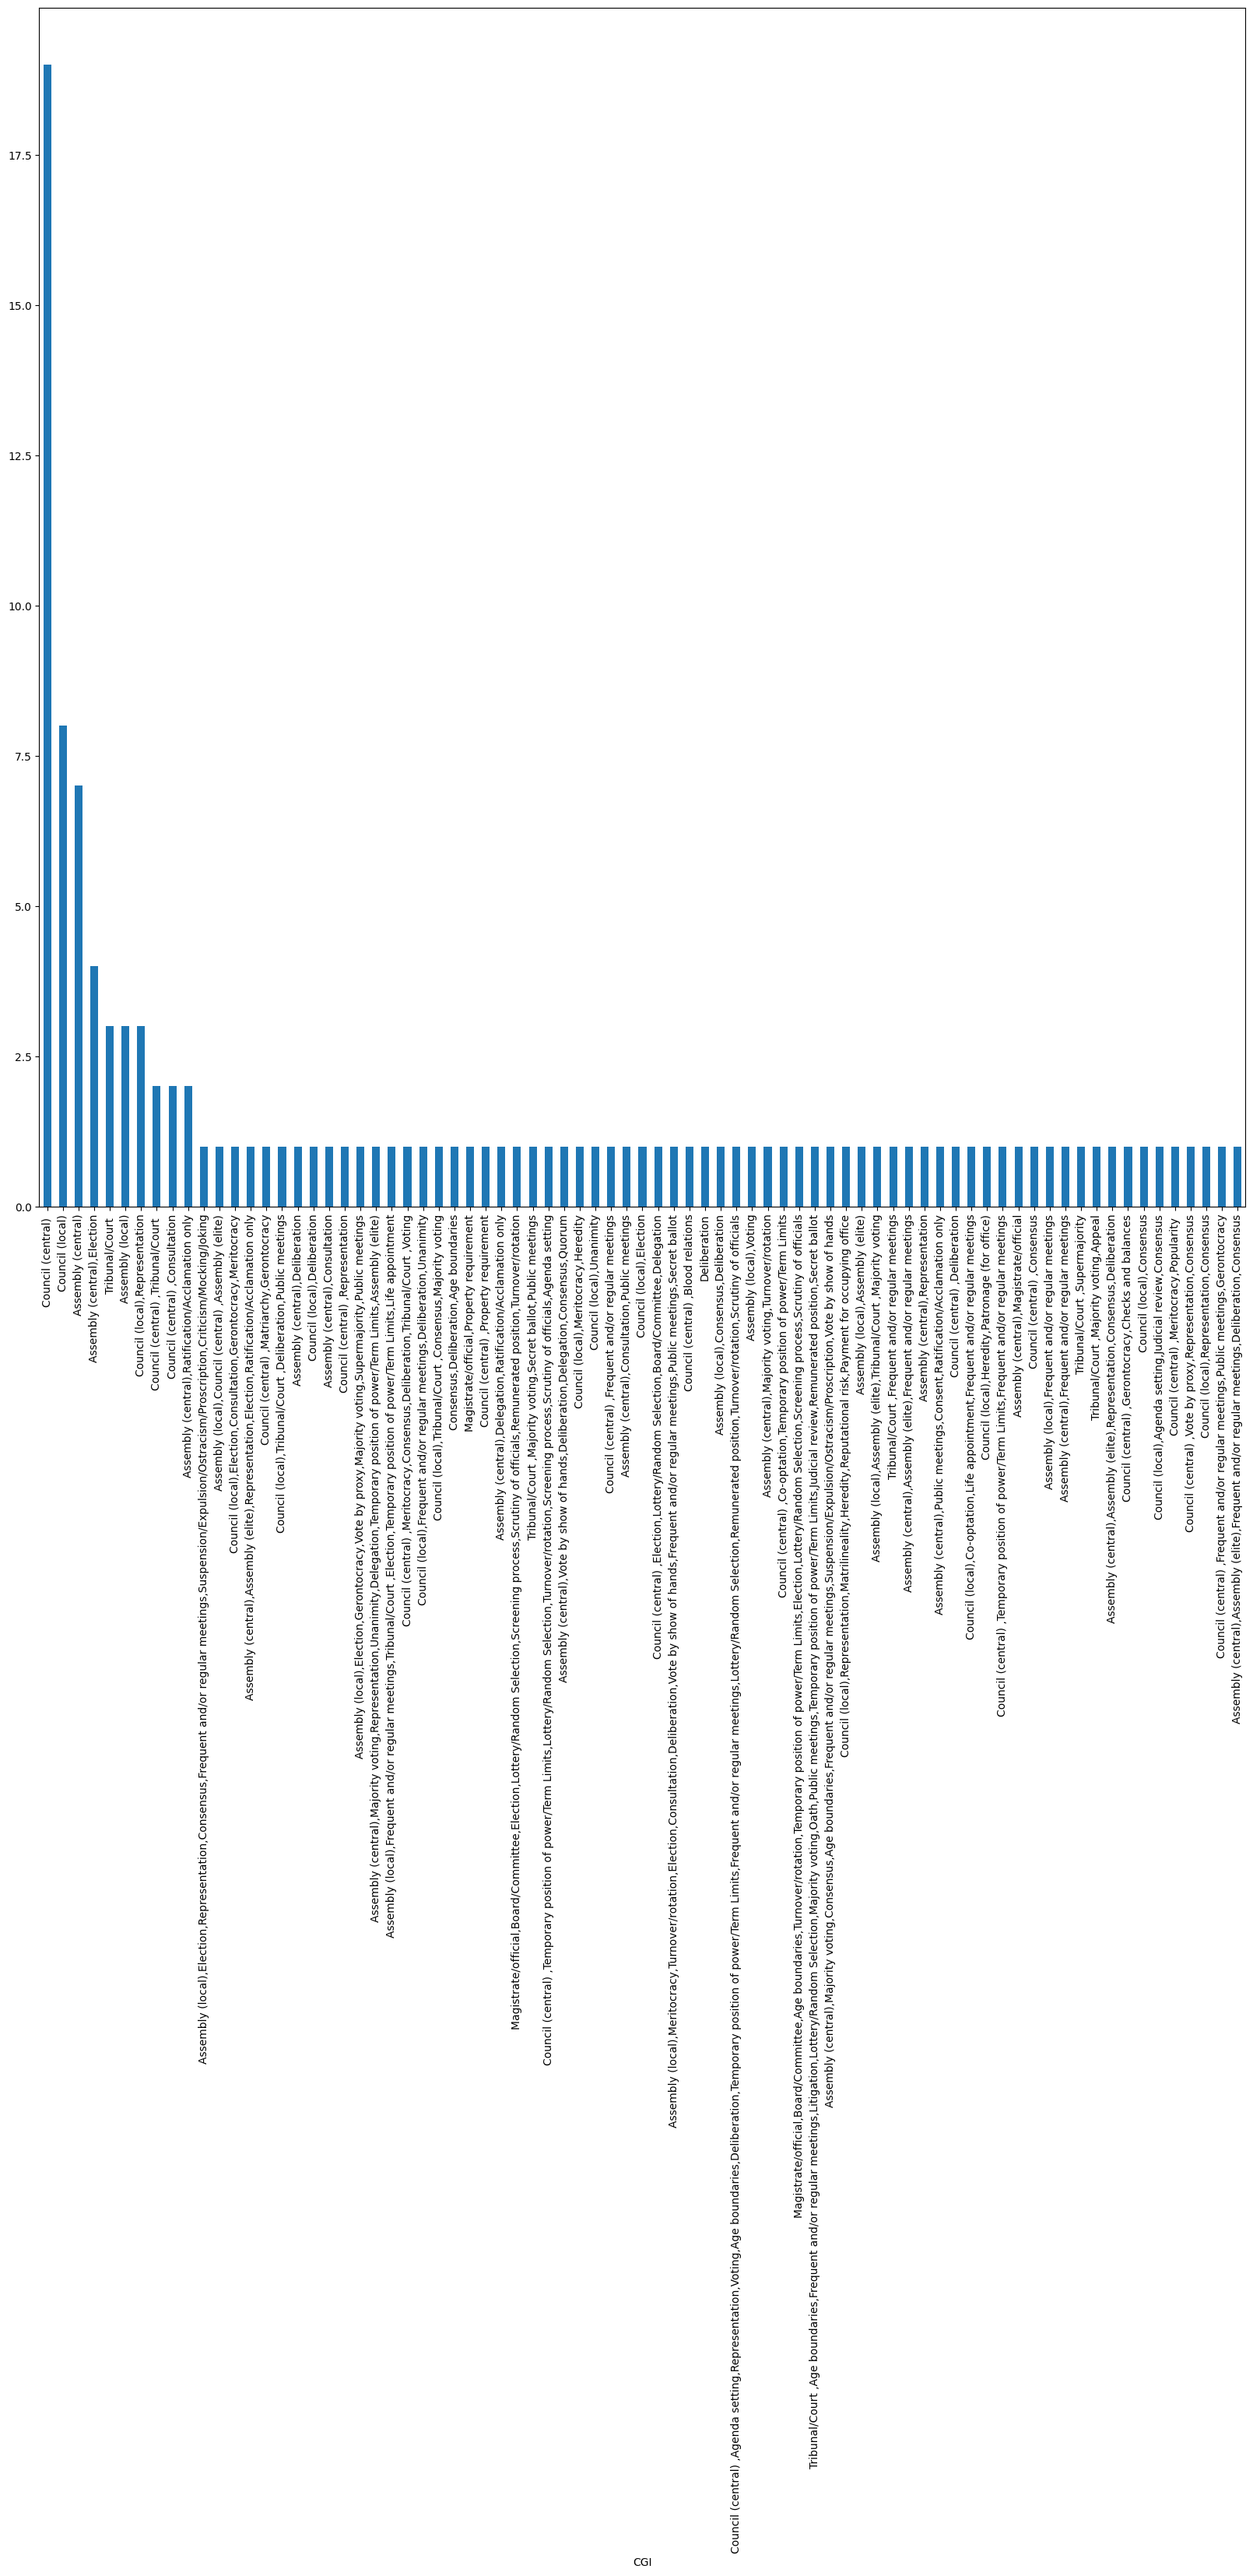

In [63]:
institutions_df['CGI'].value_counts().plot(kind='bar', figsize=(20,20))

In [57]:
set(list(institutions_df['Communities']))

{'!Kung San (Ju/hoansi)',
 'Aedui (Celtic Oppida)',
 'Akha',
 'Amalfi',
 'Arab nomads',
 'Assur',
 'Athens (Classical Period)',
 'Aztec City-States',
 'Babylonia',
 'Carthage',
 'Central African communities',
 'Chinese Warring States',
 'Circassians',
 'Cologne',
 'Communes (Medieval Europe)',
 'Dutch Republic',
 'Ebla ',
 'Egypt ',
 'England (Anglo Saxon)',
 'Etruscan Dodecapolis',
 'G/wi',
 'Genoa (doge)',
 'Genoa (podesta)',
 'Greek democracies',
 'Greek oligarchies',
 'Haudenosanee (Iroquois)',
 'Hausa City-States',
 'Hmong villages',
 'Huron',
 'Iceland ',
 'Igbo People',
 'Ijo of the Eastern Niger Delta',
 'Imperial and Free Towns of the Holy Roman Empire',
 'Indian Republics',
 'Japan (Early Modern)',
 'Kachin gumlao',
 'Khasi',
 'Latium',
 'Makah',
 'Mari ',
 'Minangkabau',
 'Mixtec City-States',
 'Mohave',
 'Mongol Nomads',
 'Mosuo',
 'M’zab',
 'Nambikuara',
 'Natchez people',
 'Nebelivka',
 'Negara Ubud',
 "Nlaka'pamux",
 'Oaxaca',
 'Pathan Hill Tribes/Pashtuns',
 'Phoenicia'

In [58]:
len(set(list(institutions_df['Communities'])))

67

In [66]:
merged_df = pd.merge(gov_df_ready, institutions_df, how='left', left_on='Name', right_on='Communities')

In [67]:
merged_df.head()

Name_x                            Institutions  \
0  !Kung San (Ju/hoansi)              Hxaro,Headman,Group,Kgotla   
1  !Kung San (Ju/hoansi)              Hxaro,Headman,Group,Kgotla   
2  !Kung San (Ju/hoansi)              Hxaro,Headman,Group,Kgotla   
3  !Kung San (Ju/hoansi)              Hxaro,Headman,Group,Kgotla   
4  Aedui (Celtic Oppida)  Senatus,Elected magistrates,Assemblies   

                                           Mechanism  \
0  Leader (first among equals),Deliberation,Corpo...   
1  Leader (first among equals),Deliberation,Corpo...   
2  Leader (first among equals),Deliberation,Corpo...   
3  Leader (first among equals),Deliberation,Corpo...   
4  Election,Council (central) ,Assembly (central)...   

                                Culture/Values/Norms  \
0  Reciprocity,Cooperation,Egalitarianism,Generos...   
1  Reciprocity,Cooperation,Egalitarianism,Generos...   
2  Reciprocity,Cooperation,Egalitarianism,Generos...   
3  Reciprocity,Cooperation,Egalitarianism,Generos...   
4                            Shared identity/Kinship   

                                               Notes  \
0  Hxaro - System of mutual reciprocity and socia...   
1  Hxaro - System of mutual reciprocity and socia...   
2  Hxaro - System of mutual reciprocity and socia...   
3  Hxaro - System of mutual reciprocity and socia...   
4  There are many Celtic oppida throughout northe...   

                                       Time span     Geography  \
0  20th century - Present\n(dates are arbitrary)  Africa South   
1  20th century - Present\n(dates are arbitrary)  Africa South   
2  20th century - Present\n(dates are arbitrary)  Africa South   
3  20th century - Present\n(dates are arbitrary)  Africa South   
4                             2nd-1st century BC  Europe North   

                          Size  \
0               1,001 - 10,000   
1               1,001 - 10,000   
2               1,001 - 10,000   
3               1,001 - 10,000   
4  100,001 - 1 million members   

                                              Source  \
0  Polly Wiessner (1982), Risk, reciprocity and s...   
1  Polly Wiessner (1982), Risk, reciprocity and s...   
2  Polly Wiessner (1982), Risk, reciprocity and s...   
3  Polly Wiessner (1982), Risk, reciprocity and s...   
4  Collis, “Celtic” Oppida, in Hansen, A Comparat...   

                                         Metanotes_x Heterogeneity   \
0  Standing in for small-scale egalitarian bands....            NaN   
1  Standing in for small-scale egalitarian bands....            NaN   
2  Standing in for small-scale egalitarian bands....            NaN   
3  Standing in for small-scale egalitarian bands....            NaN   
4                                                NaN            NaN   

       FC comments expert check  mechanisms_include_police  \
0  Edited April 23          NaN                          0   
1  Edited April 23          NaN                          0   
2  Edited April 23          NaN                          0   
3  Edited April 23          NaN                          0   
4  Edited March 23          NaN                          0   

   mechanisms_include_gerontocracy  mechanisms_include_capital_punishment  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   mechanisms_include_lottery_random_selection  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   mechanisms_include_negotiation  \
0                               1   
1                    

In [65]:
merged_df['CGI']

0                                                    NaN
1                                                    NaN
2                                           Deliberation
3                                                    NaN
4                                     Council (central) 
5                                                    NaN
6       Assembly (central),Ratification/Acclamation only
7                                                    NaN
8                                                    NaN
9                                                    NaN
10                                                   NaN
11                                                   NaN
12                                                   NaN
13                                                   NaN
14     Council (central) ,Vote by proxy,Representatio...
15                                                   NaN
16                                                   NaN
17                             

In [68]:
# TODO: Merge CGI data into Communities dataset? Or: Run a separate analysis for Institutions data

# Encode Collective Governance Institutions (CGIs)

In [69]:
institutions_df['CGI']

0                                                    NaN
1                                                    NaN
2                                           Deliberation
3                                                    NaN
4                                                    NaN
5                                                    NaN
6                                                    NaN
7                                                    NaN
8                                                    NaN
9                                                    NaN
10                                                   NaN
11     Council (central) ,Vote by proxy,Representatio...
12                                                   NaN
13                                                   NaN
14                                                   NaN
15                       Council (central) ,Deliberation
16                                                   NaN
17                             

In [79]:
cgi_list = list(institutions_df['CGI'].fillna(''))

In [80]:
cgi_list

['',
 '',
 'Deliberation',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Council (central) ,Vote by proxy,Representation,Consensus',
 '',
 '',
 '',
 'Council (central) ,Deliberation',
 '',
 '',
 'Assembly (central),Public meetings,Consent,Ratification/Acclamation only',
 '',
 'Council (central) ',
 'Assembly (central),Representation',
 '',
 'Assembly (central),Assembly (elite),Frequent and/or regular meetings',
 '',
 'Tribunal/Court ',
 'Tribunal/Court ,Frequent and/or regular meetings',
 '',
 '',
 'Assembly (local),Assembly (elite),Tribunal/Court ,Majority voting',
 '',
 '',
 '',
 '',
 'Council (central) ',
 '',
 'Council (central) ',
 'Assembly (central)',
 '',
 'Council (central) ',
 '',
 '',
 'Assembly (central)',
 'Council (central) ',
 '',
 'Assembly (central),Ratification/Acclamation only',
 '',
 'Council (local),Representation,Matrilineality,Heredity,Reputational risk,Payment for occupying office',
 '',
 'Council (central) ,Agenda setting,Representation,Voting,Age boundaries,Delibe

In [81]:
cgi_set = set()

In [83]:
[cgi_set.update(cgis.split(',')) for cgis in cgi_list]
cgi_set

{'',
 'Age boundaries',
 'Agenda setting',
 'Appeal',
 'Assembly (central)',
 'Assembly (elite)',
 'Assembly (local)',
 'Blood relations',
 'Board/Committee',
 'Checks and balances',
 'Co-optation',
 'Consensus',
 'Consent',
 'Consultation',
 'Council (central) ',
 'Council (local)',
 'Criticism/Mocking/Joking',
 'Delegation',
 'Deliberation',
 'Election',
 'Frequent and/or regular meetings',
 'Gerontocracy',
 'Heredity',
 'Judicial review',
 'Life appointment',
 'Litigation',
 'Lottery/Random Selection',
 'Magistrate/official',
 'Majority voting',
 'Matriarchy',
 'Matrilineality',
 'Meritocracy',
 'Oath',
 'Patronage (for office)',
 'Payment for occupying office',
 'Popularity ',
 'Property requirement',
 'Public meetings',
 'Quorum',
 'Ratification/Acclamation only',
 'Remunerated position',
 'Representation',
 'Reputational risk',
 'Screening process',
 'Scrutiny of officials',
 'Secret ballot',
 'Supermajority',
 'Suspension/Expulsion/Ostracism/Proscription',
 'Temporary position o

In [84]:
cgi_set.remove('')

In [85]:
cgi_set

{'Age boundaries',
 'Agenda setting',
 'Appeal',
 'Assembly (central)',
 'Assembly (elite)',
 'Assembly (local)',
 'Blood relations',
 'Board/Committee',
 'Checks and balances',
 'Co-optation',
 'Consensus',
 'Consent',
 'Consultation',
 'Council (central) ',
 'Council (local)',
 'Criticism/Mocking/Joking',
 'Delegation',
 'Deliberation',
 'Election',
 'Frequent and/or regular meetings',
 'Gerontocracy',
 'Heredity',
 'Judicial review',
 'Life appointment',
 'Litigation',
 'Lottery/Random Selection',
 'Magistrate/official',
 'Majority voting',
 'Matriarchy',
 'Matrilineality',
 'Meritocracy',
 'Oath',
 'Patronage (for office)',
 'Payment for occupying office',
 'Popularity ',
 'Property requirement',
 'Public meetings',
 'Quorum',
 'Ratification/Acclamation only',
 'Remunerated position',
 'Representation',
 'Reputational risk',
 'Screening process',
 'Scrutiny of officials',
 'Secret ballot',
 'Supermajority',
 'Suspension/Expulsion/Ostracism/Proscription',
 'Temporary position of pow

In [89]:
for cgi in cgi_set:
    cgi_str = cgi.lower().replace('/', '_').replace(' ','_').replace('(','').replace(')','') # Normalize text
    col_name = 'cgis_include_' + cgi_str
    institutions_df[col_name] = np.where(institutions_df['CGI'].str.contains(cgi), 1, 0)

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/3130462914.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  institutions_df[col_name] = np.where(institutions_df['CGI'].str.contains(cgi), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/3130462914.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  institutions_df[col_name] = np.where(institutions_df['CGI'].str.contains(cgi), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/3130462914.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  institutions_df[col_name] = np.where(institutions_df['CGI'].str.contains(cgi), 1, 0)
/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_36935/3130462914.py:4: UserWarning:

In [90]:
institutions_df.head()

Name            Communities           CGI  \
0                           Hxaro  !Kung San (Ju/hoansi)           NaN   
1                         Headman  !Kung San (Ju/hoansi)           NaN   
2                           Group  !Kung San (Ju/hoansi)  Deliberation   
3                          Kgotla  !Kung San (Ju/hoansi)           NaN   
4  Village Founder-Leader (dzoma)                   Akha           NaN   

                                         Description  \
0  System of mutual reciprocity partnerships\n\n'...   
1  Headman. According to Lee, headmen become more...   
2  Decisions are made by the group and by discuss...   
3  Court\n\nLed by the headman. introduced upon c...   
4  Person with the highest authority in the villa...   

                                 Institutional links Metanotes  \
0              Inspiring principle of community life       NaN   
1          leader of the community, heads the kgotla       NaN   
2                                          community       NaN   
3                                 led by the headman       NaN   
4  Council of Elders:\n-\tAlthough dzoma does arb...       NaN   

   cgis_include_heredity  cgis_include_magistrate_official  \
0                      1                                 1   
1                      1                                 1   
2                      0                                 0   
3                      1                                 1   
4                      1                                 1   

   cgis_include_remunerated_position  cgis_include_voting  \
0                                  1                    1   
1                                  1                    1   
2                                  0                    0   
3                                  1                    1   
4                                  1                    1   

   cgis_include_consent  cgis_include_gerontocracy  \
0                     1                          1   
1                     1                          1   
2                     0                          0   
3                     1                          1   
4                     1                          1   

   cgis_include_board_committee  cgis_include_screening_process  \
0                             1                               1   
1                             1                               1   
2                             0                               0   
3                             1                               1   
4                             1                               1   

   cgis_include_assembly_elite  cgis_include_meritocracy  \
0                            1                         1   
1                            1                         1   
2                            0                         0   
3                            1                         1   
4                            1                         1   

   cgis_include_supermajority  cgis_include_consensus  \
0                           1                       1   
1                           1                       1   
2                           0                       0   
3                           1                       1   
4                           1                       1   

   cgis_include_lottery_random_selection  cgis_include_matriarchy  \
0                                      1                        1   
1                                      1                        1   
2                                      0                        0   
3                                      1                        1   
4                                      1                        1   

   cgis_include_deliberation  cgis_include_blood_relations  \
0                          1                             1   
1                          1                             1   
2                          1                             0   
3              

In [91]:
# Write prepped dataset to csv
institutions_df.to_csv('data/institutions_data_prepped.csv', index=False)